<a href="https://colab.research.google.com/github/Cralsic123/PS4E5_flood/blob/main/PS4E5_Trial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c playground-series-s4e5

100% 28.0M/28.0M [00:00<00:00, 99.4MB/s]
100% 28.0M/28.0M [00:00<00:00, 93.6MB/s]


In [3]:
import pandas as pd

In [4]:
import zipfile
with zipfile.ZipFile('/content/playground-series-s4e5.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [5]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [6]:
train_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [7]:
train_df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

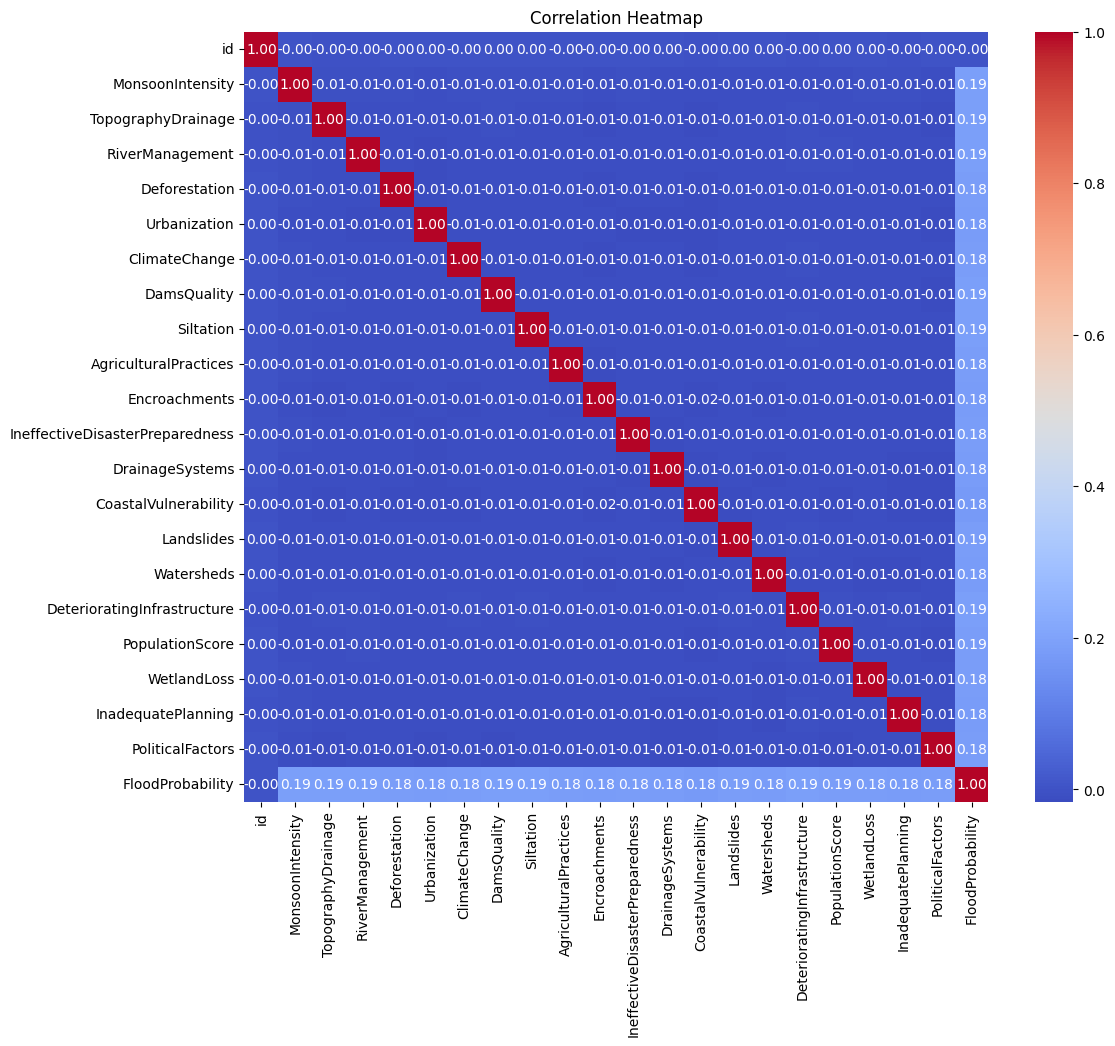

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = train_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


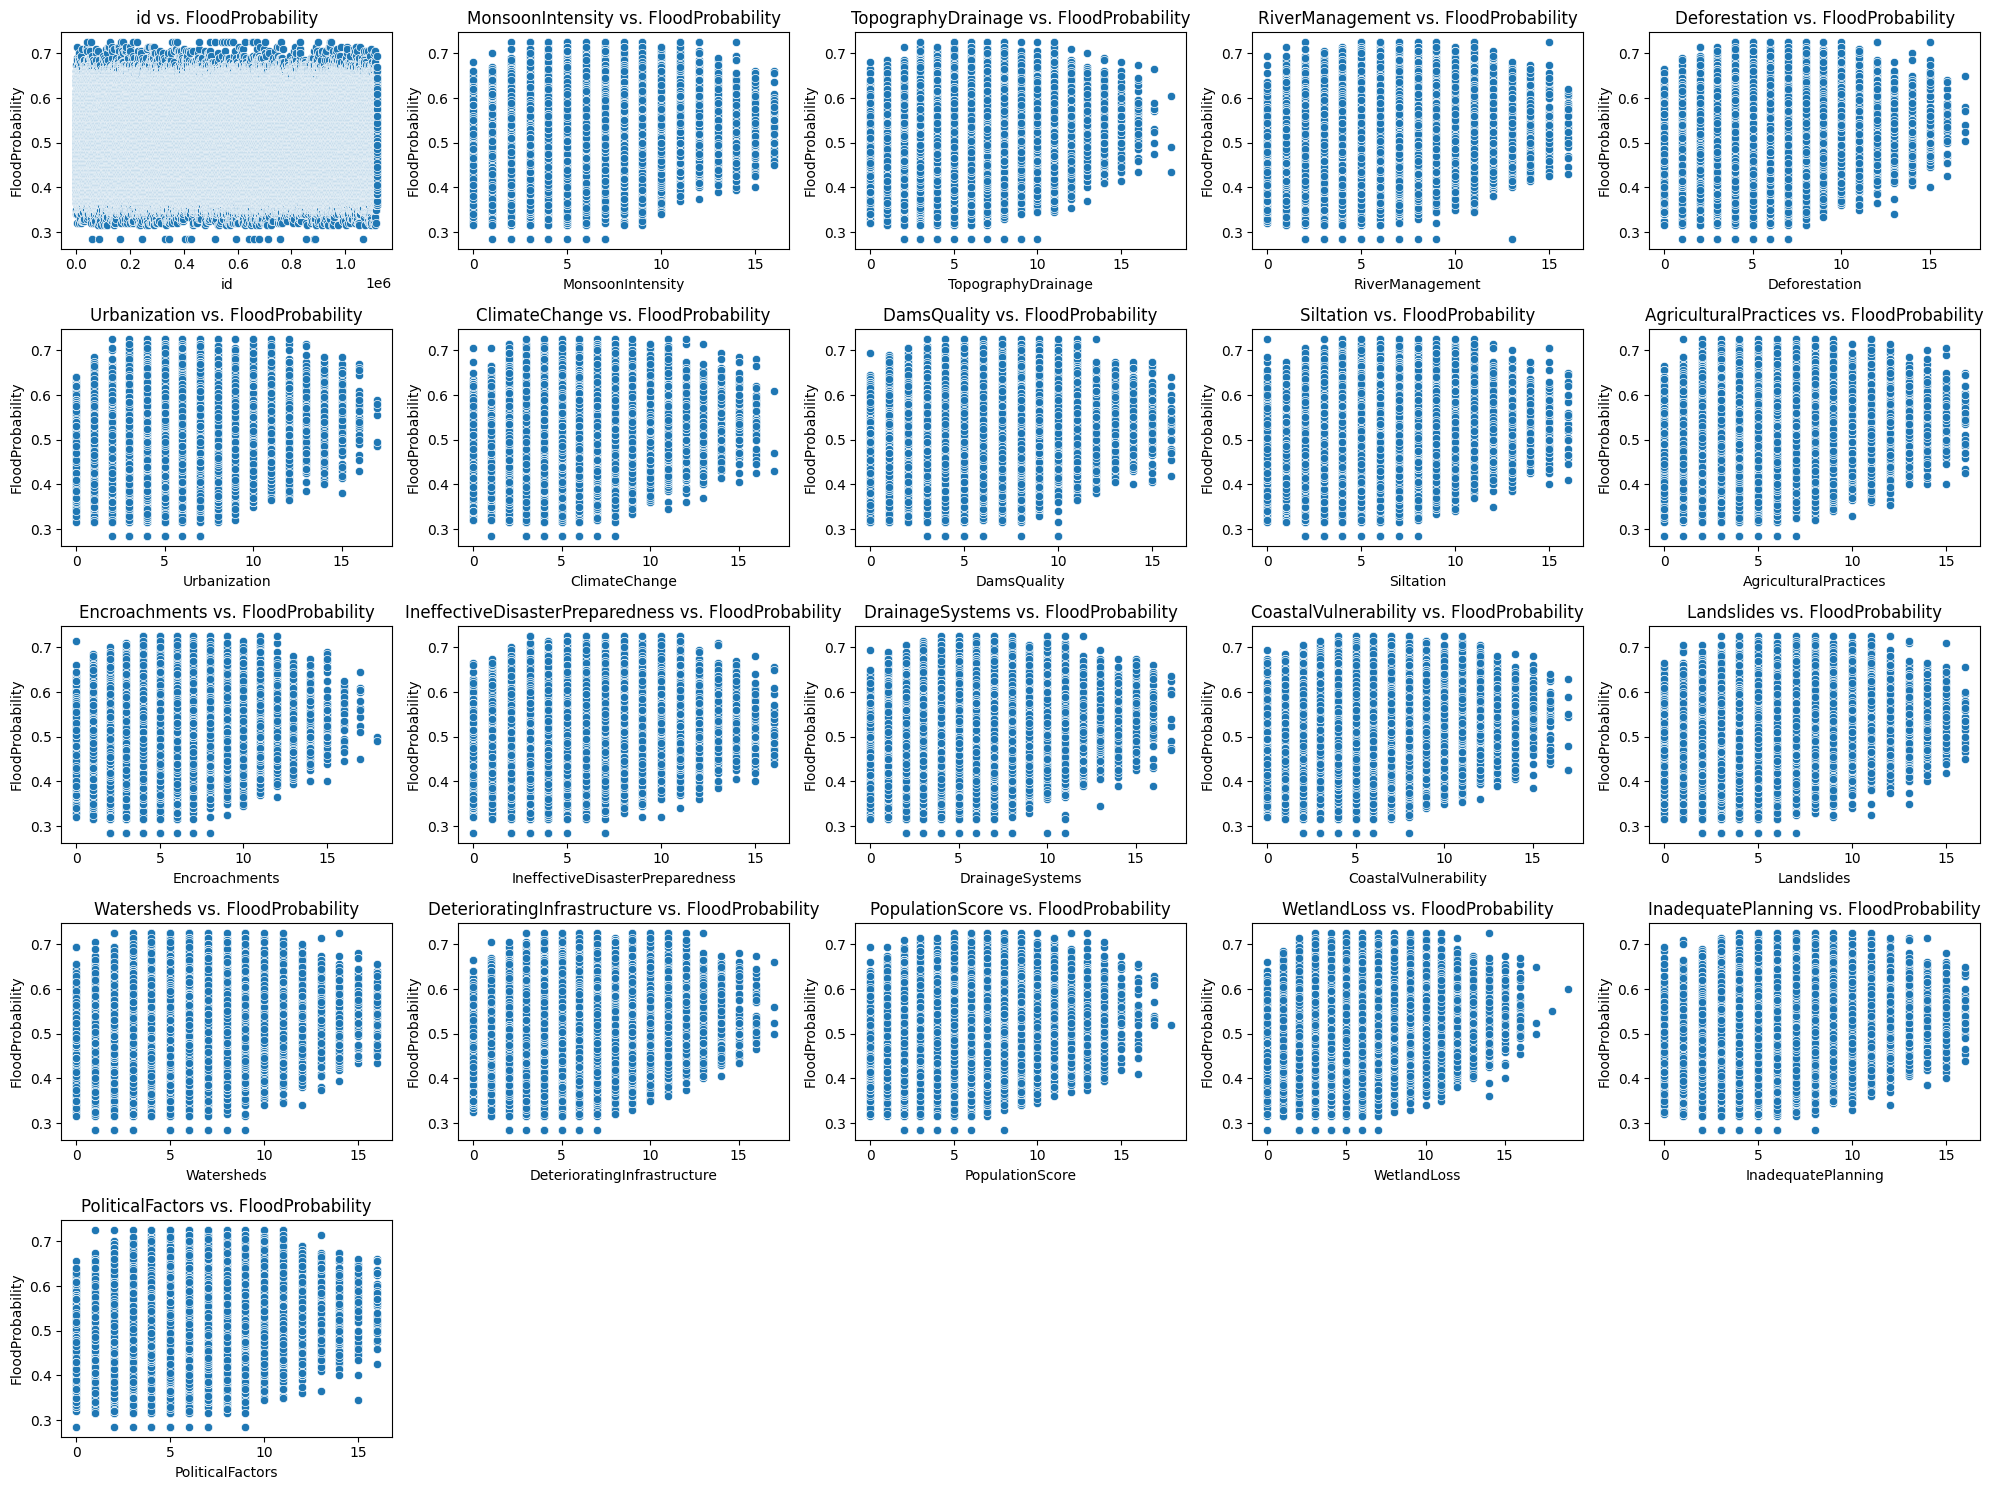

In [9]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(train_df.columns[:-1]):
    plt.subplot(5, 5, i+1)
    sns.scatterplot(x=col, y='FloodProbability', data=train_df)
    plt.title(f'{col} vs. FloodProbability')
plt.tight_layout()
plt.show()


In [10]:
correlation_with_flood = train_df.corr()['FloodProbability'].sort_values(ascending=False)
print(correlation_with_flood * 100)


FloodProbability                   100.000000
DeterioratingInfrastructure         19.000696
MonsoonIntensity                    18.909829
DamsQuality                         18.799615
TopographyDrainage                  18.763505
RiverManagement                     18.713065
Siltation                           18.678927
PopulationScore                     18.588970
Landslides                          18.534606
ClimateChange                       18.476149
Deforestation                       18.400092
WetlandLoss                         18.339642
AgriculturalPractices               18.336565
IneffectiveDisasterPreparedness     18.310870
PoliticalFactors                    18.241694
Watersheds                          18.190650
InadequatePlanning                  18.096768
Urbanization                        18.086051
DrainageSystems                     17.930491
Encroachments                       17.884077
CoastalVulnerability                17.777439
id                                

In [11]:
null_values = train_df.isnull().sum()
print(null_values)

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


In [14]:
x = train_df.drop(columns = {'FloodProbability','id'}, axis =1)
y = train_df['FloodProbability']

In [ ]:
tra